In [1]:
from googlefinance import getQuotes
from yahoo_finance_api2 import share
import json
import datetime
import pandas as pd
# import pandas_datareader as web
# from pandas_datareader import data, wb

import datetime as dt
from pandas_datareader import data as pdr
import yfinance as yfin
import matplotlib.pyplot as plt

from commons import read_xls, get_stock_data, NSE_BSE, BSE_NSE, save_csv, get_holding_quantities

In [2]:
### Query Period and timeframe
START = dt.datetime(2015, 1, 1) #dt.datetime(2020, 1, 1)
END = dt.datetime.today()
INTERVAL = '1wk' #'1d'
QTYS = get_holding_quantities()


In [3]:
def get_first_non_nan(df):
    df1 = df.fillna('NULL')
    d = dict()
    for s in NSE_BSE.keys():
        for v in df1[s].to_list():
            if v != 'NULL':
                break

        d[s] = v
        
    return pd.Series(d)

[*********************100%%**********************]  25 of 25 completed
Saved: /Users/aniron/Documents/Tracked/PyHelloWorld/docs/outputs/historical_port_data_20231228150940.csv


array([[<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
        <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
        <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
        <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
        <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
        <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
        <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
        <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
        <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
        <AxesSubplot:xlabel='Date'>]], dtype=object)

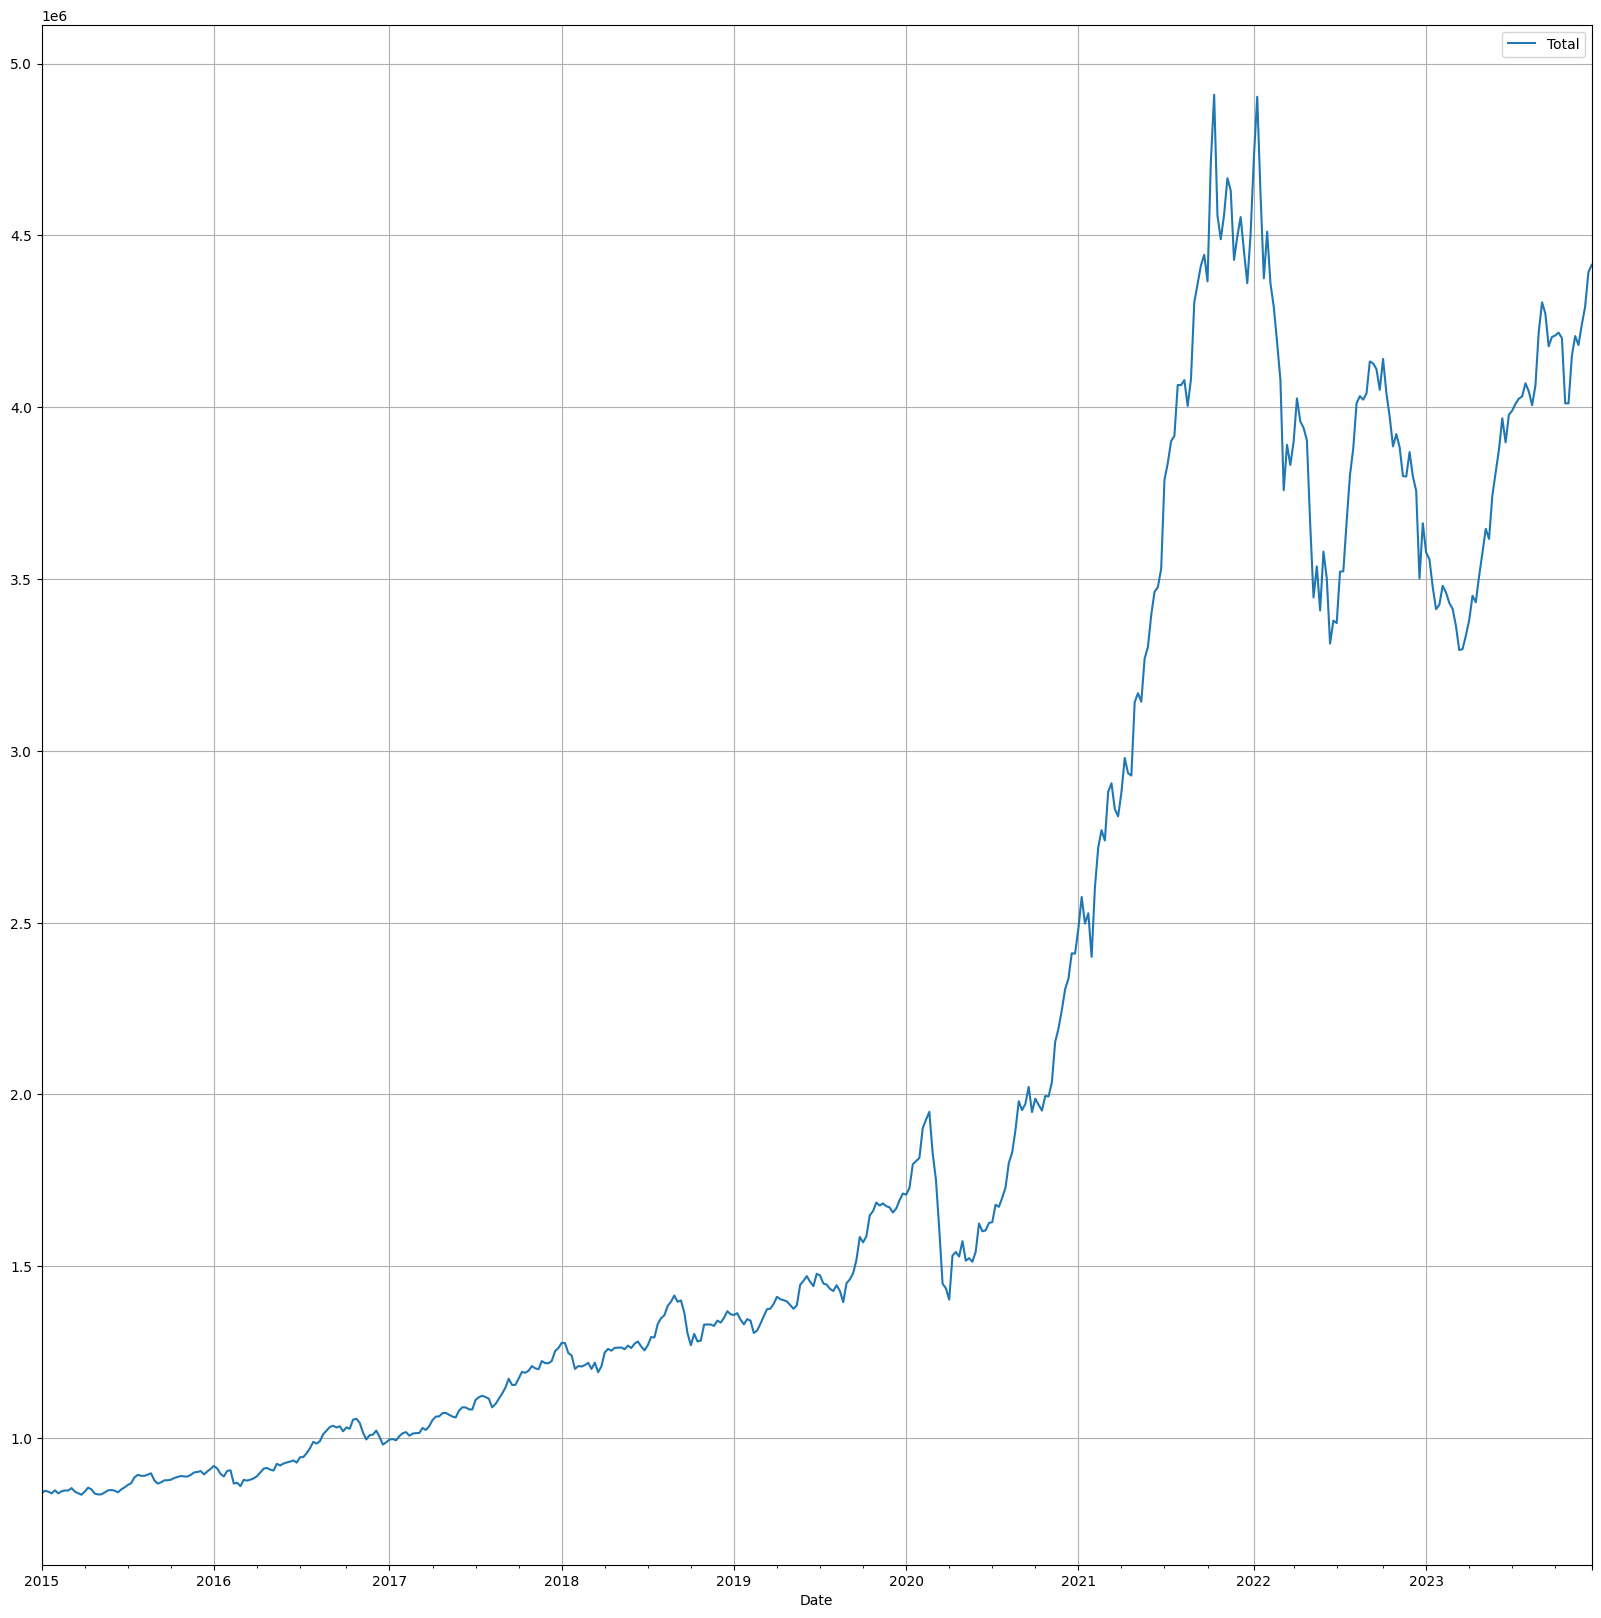

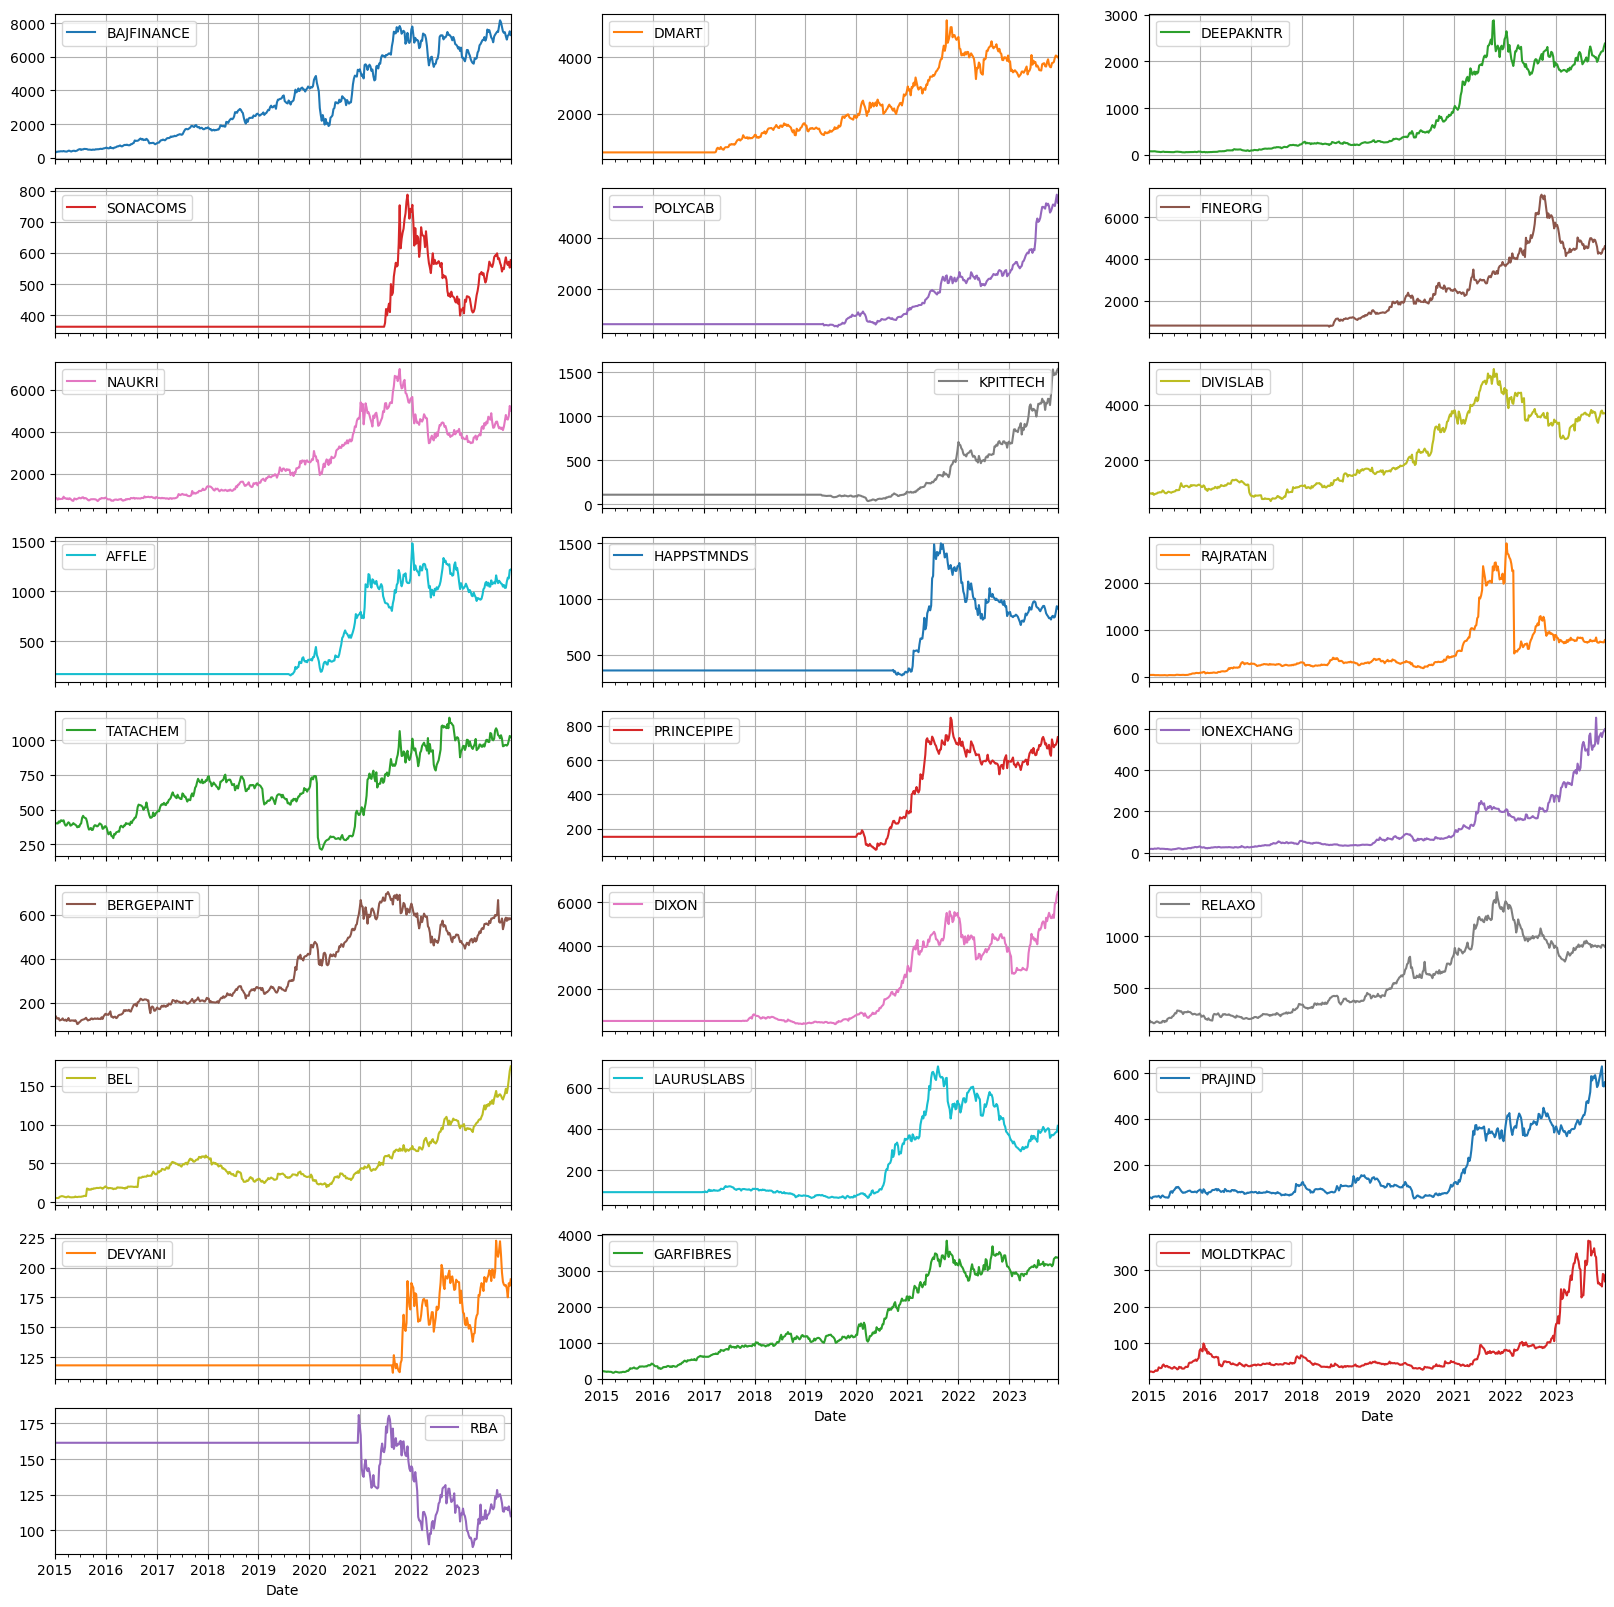

In [8]:
stocks = list(NSE_BSE.values())
yfin.pdr_override()

df = pdr.get_data_yahoo(stocks, start=START, end=END, interval=INTERVAL)
if INTERVAL == '1wk':
    df = df.asfreq('W-FRI', method='pad')
df = df['Adj Close']
df = df.rename(columns=BSE_NSE)


# df.mean()
# df = df.fillna(df.mean())
# https://stackoverflow.com/questions/42137529/pandas-find-first-non-null-value-in-column
# print(df.loc[~df.isnull().sum(1).astype(bool)].iloc[0]) ### Buggy... HAPPSTMNDS wrong

# Fill first listed value previously for new stocks
df1 = df.fillna(get_first_non_nan(df))

for k in NSE_BSE.keys():
    df1[f'{k}_QTY'] = QTYS[k]

# print(df)

def myfunc(k):
#     print(f"{type(k)}, {k.loc['AFFLE']} ")
    val = 0
    for name in QTYS.keys():
        val += k[name] * k[f'{name}_QTY']
    return val

df['Total'] = df1.apply(myfunc, axis=1)

### Save
save_csv(df, 'historical_port_data')

### Plot Total and all shares
df[['Total']].plot(grid=True, figsize=(20,20))
df1[QTYS.keys()].plot(subplots=True, layout=(9,3), figsize=(20,20), grid=True)

# spy['Close'].values, spy['Close'].index.values
spy.describe()
# dir(spy)
# spy.to_dict()
# spy['Adj Close']

In [5]:
def get_first_non_nan(df):
    df1 = df.fillna('NULL')
    d = dict()
    for s in NSE_BSE.keys():
        for v in df1[s].to_list():
            if v != 'NULL':
                break

        d[s] = v
        
    return pd.Series(d)

# get_first_non_nan(df)

#json.dumps(getQuotes('AAPL'), indent=2)
baj = share.Share('BAJFINANCE.BO')

d = baj.get_historical(share.PERIOD_TYPE_WEEK,
                                          3,
                                          share.FREQUENCY_TYPE_WEEK,
                                          1)

# print([datetime.fromtimestamp(x) for x in d['timestamp']])
d

In [6]:
stocks = list(NSE_BSE.values()) # ['BAJFINANCE.BO', 'DMART.NS']
start = dt.datetime(2005, 1, 1)
end = dt.datetime.today() # dt.datetime(2023, 11, 30)
# d = web.DataReader(stocks, 'yahoo', start, end)
# d = data.DataReader("BAJFINANCE.BO",'yahoo', start='2021-09-10', end='2022-10-09')

yfin.pdr_override()

df = pdr.get_data_yahoo(stocks, start=start, end=end, interval='1wk') #['Adj Close']
df = df.asfreq('W-FRI', method='pad')
df = df['Adj Close']
df = df.rename(columns=BSE_NSE)



df['HAPPSTMNDS'].loc[~df.isnull().sum(1).astype(bool)].iloc[0]
df['HAPPSTMNDS']

[*********************100%%**********************]  25 of 25 completed


Date
2005-01-07           NaN
2005-01-14           NaN
2005-01-21           NaN
2005-01-28           NaN
2005-02-04           NaN
                 ...    
2023-11-24    832.349976
2023-12-01    837.900024
2023-12-08    881.950012
2023-12-15    934.700012
2023-12-22    915.500000
Freq: W-FRI, Name: HAPPSTMNDS, Length: 990, dtype: float64

In [7]:
df.head()

,AFFLE,BAJFINANCE,BEL,BERGEPAINT,DEEPAKNTR,DEVYANI,DIVISLAB,DIXON,DMART,FINEORG,...,MOLDTKPAC,NAUKRI,POLYCAB,PRAJIND,PRINCEPIPE,RAJRATAN,RBA,RELAXO,SONACOMS,TATACHEM
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-07,NaN,2.894166,4.562216e-13,3.287312,5.240747,NaN,36.325329,NaN,NaN,NaN,...,2.380552,NaN,NaN,7.138882,NaN,36.289810,NaN,0.292542,NaN,102.319710
2005-01-14,NaN,2.847183,4.343975e-13,3.184584,4.862462,NaN,35.433422,NaN,NaN,NaN,...,2.623867,NaN,NaN,6.864050,NaN,38.874550,NaN,0.277758,NaN,97.291313
2005-01-21,NaN,2.998704,4.303763e-13,3.433929,4.701655,NaN,33.989368,NaN,NaN,NaN,...,3.064466,NaN,NaN,6.799383,NaN,37.034218,NaN,0.253566,NaN,99.594627
2005-01-28,NaN,3.139653,4.421109e-13,3.712625,4.805789,NaN,35.259140,NaN,NaN,NaN,...,2.761966,NaN,NaN,7.949904,NaN,36.000317,NaN,0.258942,NaN,103.552460
2005-02-04,NaN,3.187811,4.311074e-13,4.354621,5.157156,NaN,33.378647,NaN,NaN,NaN,...,2.873759,NaN,NaN,9.161046,NaN,37.220325,NaN,0.263422,NaN,107.218346
